# Spotify Music Data
This dataset consists of ~600 songs that were in the top songs of the year from 2010 to 2019 (as measured by Billboard). You can explore interesting song data pulled from [Spotify](http://organizeyourmusic.playlistmachinery.com/#) such as the beats per minute, amount of spoken words, loudness, and energy of every song. 

Not sure where to begin? Scroll to the bottom to find challenges!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("spotify_top_music.csv", index_col=0)

df

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


## Data dictionary

|    | Variable   | Explanation                                                |
|---:|:-----------|:-----------------------------------------------------------|
|  0 | title      | The title of the song                                      |
|  1 | artist     | The artist of the song                                     |
|  2 | top genre  | The genre of the song                                      |
|  3 | year       | The year the song was in the Billboard                     |
|  4 | bpm        | Beats per minute: the tempo of the song                    |
|  5 | nrgy       | The energy of the song: higher values mean more energetic (fast, loud)  |
|  6 | dnce       | The danceability of the song: higher values mean it's easier to dance to  |
|  7 | dB         | Decibel: the loudness of the song  |
|  8 | live       | Liveness: likeliness the song was recorded with a live audience  |
|  9 | val        | Valence: higher values mean a more positive sound (happy, cheerful) |
| 10 | dur        | The duration of the song |
| 11 | acous      | The acousticness of the song: likeliness the song is acoustic|
| 12 | spch       | Speechines: higher values mean more spoken words |
| 13 | pop        | Popularity: higher values mean more popular|

[Source](https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year) of dataset.

## Don't know where to start? 

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Which artists and genres are the most popular?
- 📊 **Visualize**: Visualize the numeric values as a time-series by year. Can you spot any changes over the years?
- 🔎 **Analyze**: Train and build a classifier to predict a song's genre based on columns 3 to 13.

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

Your friend, who is an aspiring musician, wants to make a hit song and has asked you to use your data skills to help her. You have decided to analyze what makes a top song, keeping in mind changes over the years. What concrete recommendations can you give her before she writes lyrics, makes beats, and records the song? She's open to any genre!

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

---

✍️ _If you have an idea for an interesting Scenario or Challenge, or have feedback on our existing ones, let us know! You can submit feedback by pressing the question mark in the top right corner of the screen and selecting "Give Feedback". Include the phrase "Content Feedback" to help us flag it in our system._

To get Start, lets first discover which artist and geners are the most popular.
Popularity index is already given in sheet, but popularity is assigned to that particular song not with artist or gener.

To better understand about artist and gener popularity we need to know about frequency of that artist and gener in this whole list.



In [6]:
L = df['artist'].value_counts()
L

Katy Perry             17
Justin Bieber          16
Rihanna                15
Maroon 5               15
Lady Gaga              14
                       ..
Iggy Azalea             1
5 Seconds of Summer     1
Michael Jackson         1
Disclosure              1
Daddy Yankee            1
Name: artist, Length: 184, dtype: int64

Above shows Katy Perry gave max number of top songs from 2010 to 2019.
And lets see what's her average popularity of all the songs combined. 

In [14]:

df2=df.where(df["artist"] == "Katy Perry")
df3 = df2.dropna(subset=['artist'])
df3


,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
29,Teenage Dream,Katy Perry,dance pop,2010.0,120.0,80.0,72.0,-5.0,13.0,59.0,228.0,2.0,4.0,63.0
30,California Gurls,Katy Perry,dance pop,2010.0,125.0,75.0,79.0,-4.0,18.0,40.0,235.0,0.0,5.0,62.0
78,E.T.,Katy Perry,dance pop,2011.0,152.0,87.0,62.0,-5.0,37.0,76.0,230.0,2.0,18.0,66.0
102,Last Friday Night (T.G.I.F.),Katy Perry,dance pop,2011.0,126.0,81.0,65.0,-4.0,67.0,72.0,231.0,0.0,4.0,27.0
103,Firework,Katy Perry,dance pop,2011.0,124.0,83.0,64.0,-5.0,11.0,65.0,228.0,14.0,5.0,25.0
125,Part Of Me,Katy Perry,dance pop,2012.0,130.0,92.0,68.0,-5.0,7.0,77.0,216.0,0.0,4.0,71.0
128,Wide Awake,Katy Perry,dance pop,2012.0,160.0,68.0,51.0,-5.0,39.0,57.0,221.0,7.0,4.0,68.0
129,The One That Got Away,Katy Perry,dance pop,2012.0,134.0,80.0,69.0,-4.0,16.0,88.0,227.0,0.0,4.0,67.0
145,Roar,Katy Perry,dance pop,2013.0,180.0,77.0,55.0,-5.0,35.0,46.0,224.0,0.0,4.0,78.0
217,Dark Horse,Katy Perry,dance pop,2014.0,132.0,59.0,65.0,-6.0,17.0,35.0,216.0,0.0,5.0,78.0


In [15]:
df3["pop"].mean()

62.11764705882353

So 62.117 is the average popularity of each song for all 17 top songs she produced.

Now we will find out most popular song gener.

In [24]:
df['top genre'].value_counts()

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
complextro                     6
hip pop                        6
australian dance               6
atl hip hop                    5
australian pop                 5
edm                            5
permanent wave                 4
latin                          4
hip hop                        4
colombian pop                  3
tropical house                 3
brostep                        2
downtempo                      2
electronic trap                2
belgian edm                    2
escape room                    2
folk-pop                       2
electro                        2
indie pop                      2
detroit hi

Dance pop is the most popluar one.

In [21]:
df4=df.where(df["top genre"] == "dance pop")
df5 = df4.dropna(subset=['top genre'])
df5

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
3,TiK ToK,Kesha,dance pop,2010.0,120.0,84.0,76.0,-3.0,29.0,71.0,200.0,10.0,14.0,80.0
4,Bad Romance,Lady Gaga,dance pop,2010.0,119.0,92.0,70.0,-4.0,8.0,71.0,295.0,0.0,4.0,79.0
7,Dynamite,Taio Cruz,dance pop,2010.0,120.0,78.0,75.0,-4.0,4.0,82.0,203.0,0.0,9.0,77.0
8,Secrets,OneRepublic,dance pop,2010.0,148.0,76.0,52.0,-6.0,12.0,38.0,225.0,7.0,4.0,77.0
11,Club Can't Handle Me (feat. David Guetta),Flo Rida,dance pop,2010.0,128.0,87.0,62.0,-4.0,6.0,47.0,235.0,3.0,3.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,Giant (with Rag'n'Bone Man),Calvin Harris,dance pop,2019.0,122.0,89.0,81.0,-4.0,8.0,61.0,229.0,2.0,4.0,84.0
595,No Guidance (feat. Drake),Chris Brown,dance pop,2019.0,93.0,45.0,70.0,-7.0,16.0,14.0,261.0,12.0,15.0,81.0
599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019.0,104.0,66.0,61.0,-7.0,20.0,16.0,176.0,1.0,3.0,75.0
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019.0,136.0,76.0,53.0,-5.0,9.0,65.0,260.0,7.0,34.0,70.0


In [23]:
df5['pop'].mean()

64.36391437308869

So 64.3639 is the average popularity of each song for all 327 songs in genre "dance pop".

Lets see, what type of songs gets more popular on a time scale.

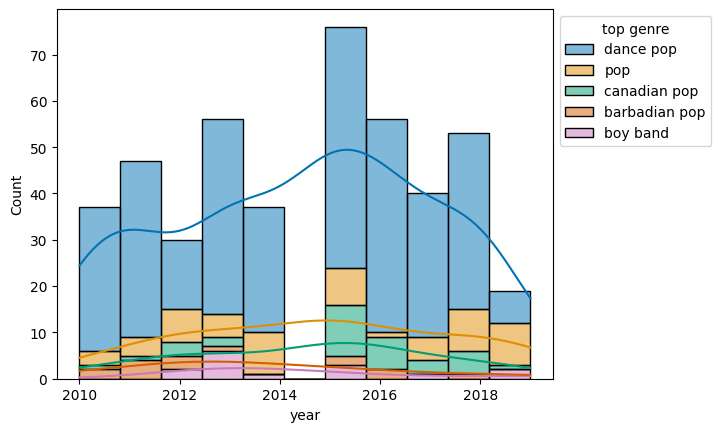

In [19]:
hue_order = ['dance pop', 'pop', 'canadian pop', 'barbadian pop', 'boy band']
g = sns.histplot(x='year', data=df, kde=True, hue="top genre", hue_order=hue_order, palette="colorblind", multiple="stack")
sns.move_legend (g, loc= 2, bbox_to_anchor = (1,1))
plt.show()

As seen in the above graph "dance pop" song genre is declining from 2015 till 2019, although this genre has maximum number of top hits during 2010 to 2019 but music trend tends to shift from dance pop to pop lately from 2017 to 2019.
So my suggestion to her would be a song mix of dance pop and pop as whole.
